In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Grouper

import statsmodels.formula.api as smf
from math import sqrt
from sklearn import metrics

from statsmodels.tsa.seasonal import seasonal_decompose

# Loading the data

In [2]:
g_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\Project\\Gold_data.csv")

In [3]:
g_df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


# EDA

In [4]:
g_df.shape

(2182, 2)

- Data set has 2182 rows and 2 columns

In [5]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


- No null values in the data

In [6]:
g_df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [7]:
g_df.price.nunique

<bound method IndexOpsMixin.nunique of 0       2252.60
1       2454.50
2       2708.10
3       2577.80
4       2597.75
         ...   
2177    4394.40
2178    4389.50
2179    4389.50
2180    4354.10
2181    4346.50
Name: price, Length: 2182, dtype: float64>

C:\Users\Mani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

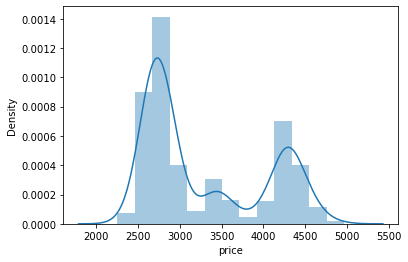

In [8]:
# Understanding the distribution of the data :

sns.distplot(g_df.price)

- Data is vaguely normally distributed

In [9]:
g_df["date"] = pd.to_datetime(g_df.date,format='%Y-%m-%d')

In [13]:
g_df["month"] = g_df.date.dt.strftime("%m") # month extraction
g_df["year"] = g_df.date.dt.strftime("%Y") # year extraction
g_df["Date"] = g_df.date.dt.strftime("%d") # Date extraction

In [15]:
g_df.tail()

,date,price,month,year,Date
2177,2021-12-17,4394.4,12,2021,17
2178,2021-12-18,4389.5,12,2021,18
2179,2021-12-19,4389.5,12,2021,19
2180,2021-12-20,4354.1,12,2021,20
2181,2021-12-21,4346.5,12,2021,21


<AxesSubplot:xlabel='year', ylabel='price'>

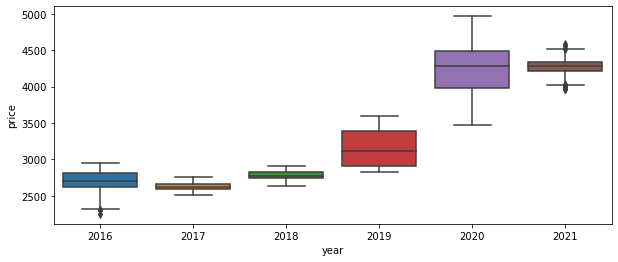

In [16]:
# Yearly Trend of the data using box plot :

plt.figure(figsize=(10,4))
sns.boxplot( x=g_df.year,y=g_df.price)

- There are a few outliers in the years 2016 and 2021 which indicate that there are lot of fluctuations in the price 

<AxesSubplot:xlabel='month', ylabel='price'>

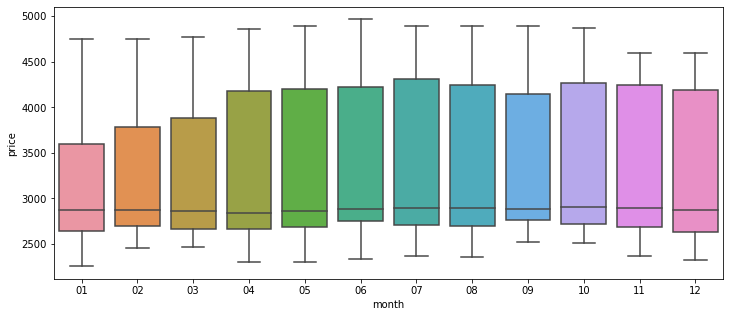

In [17]:
# Underatanding the data Month wise : 
 
plt.figure(figsize=(12,5))
sns.boxplot( x=g_df.month,y=g_df.price)

 - Median for all months is approximately same over the years
 - The variation of the data is more in the month of July and less in January

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

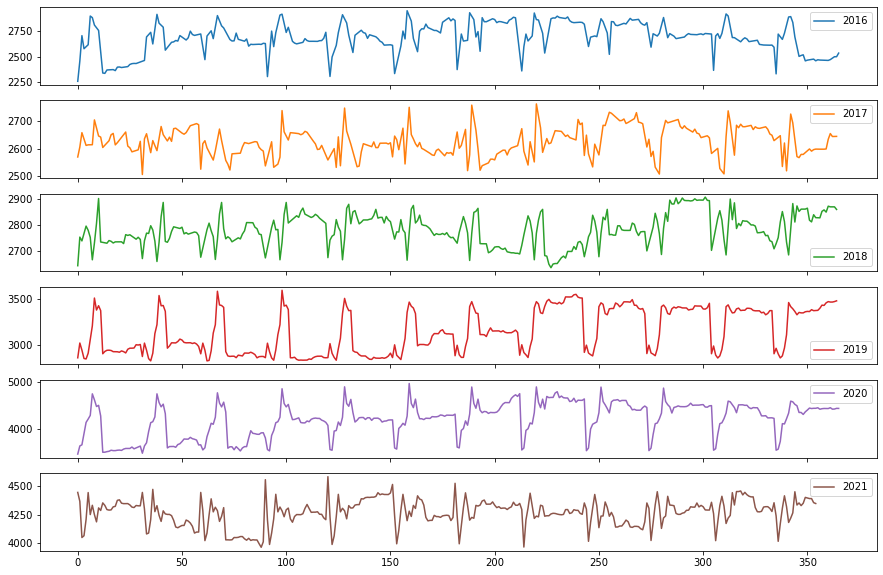

In [18]:
# Understanding the daily data  over the years

series = pd.read_csv("C:\\Users\\Mani\\Desktop\\Project\\Gold_data.csv", index_col=0,parse_dates=True , squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
      years[name.year] = pd.Series(group.values.flatten())

years.plot(subplots=True, legend=True,figsize=(15, 10))


- There seems to be some pattern in the data for each year  

In [19]:
# Set date as index 

g_df.set_index('date',inplace=True)

<AxesSubplot:title={'center':'Gold Price'}, xlabel='date'>

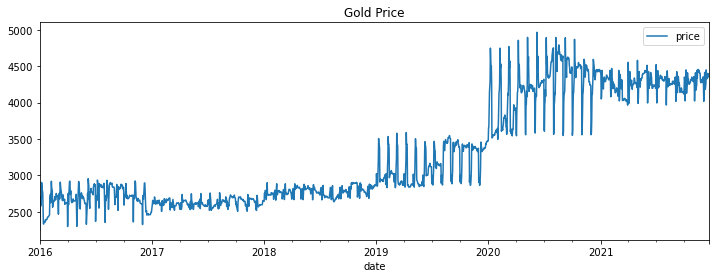

In [20]:
g_df.plot(figsize=(12,4),title='Gold Price')

<AxesSubplot:xlabel='month', ylabel='year'>

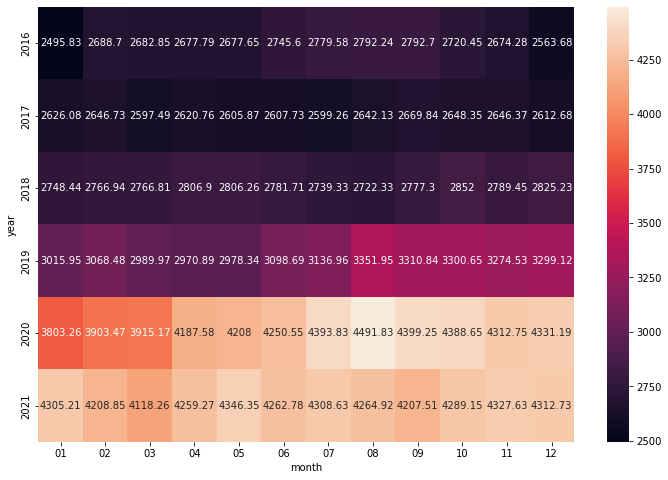

In [21]:
# Heat map

plt.figure(figsize=(12,8))
heatmap_gold=pd.pivot_table(data=g_df,values='price',index='year',columns='month',aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_gold,annot=True,fmt="g")

# Moving Average

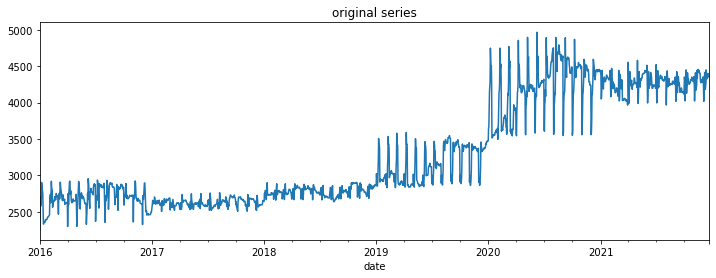

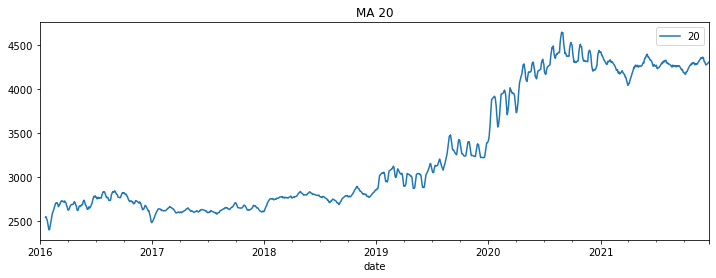

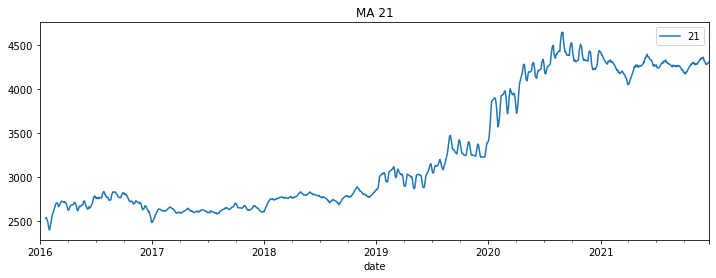

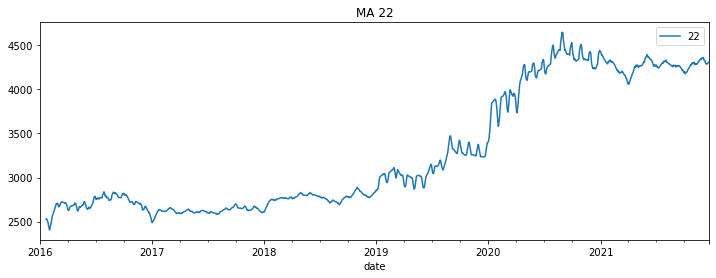

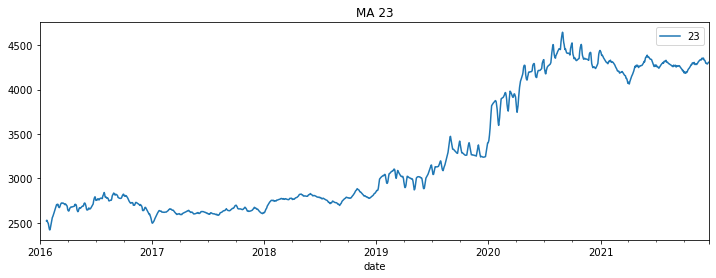

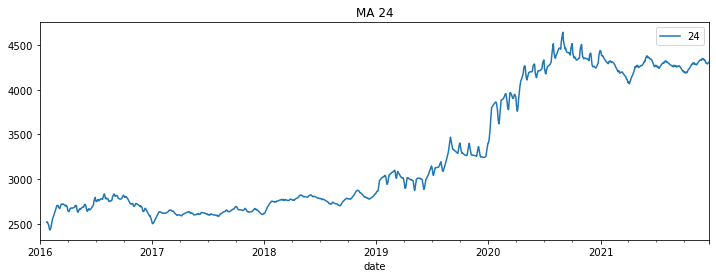

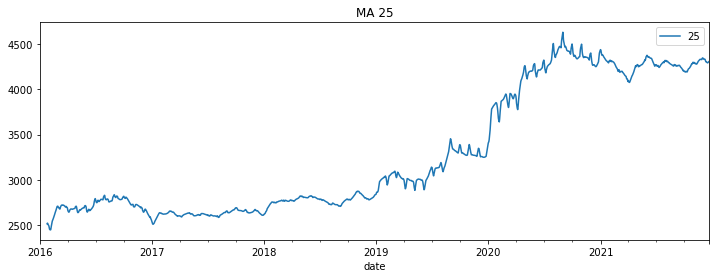

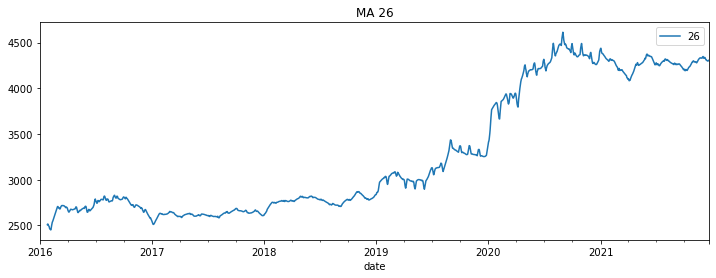

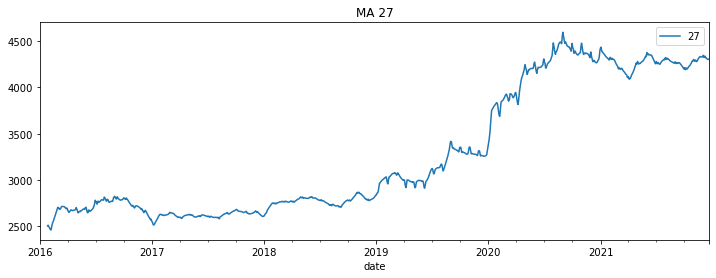

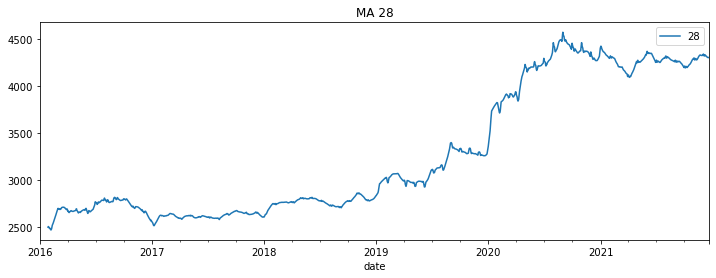

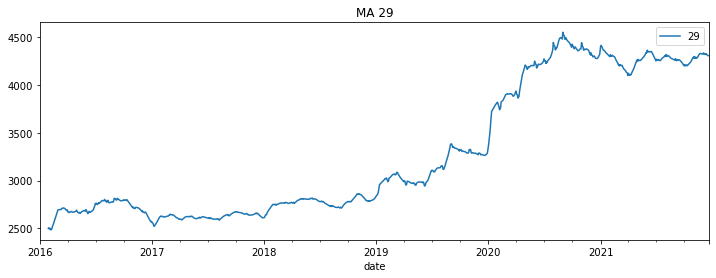

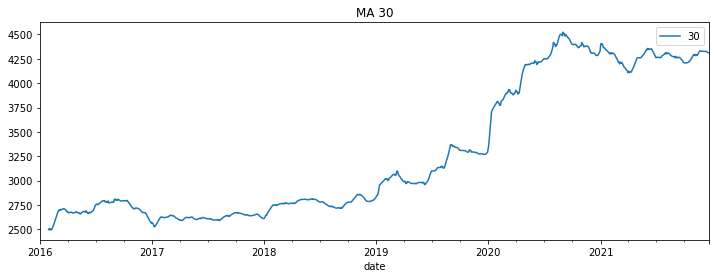

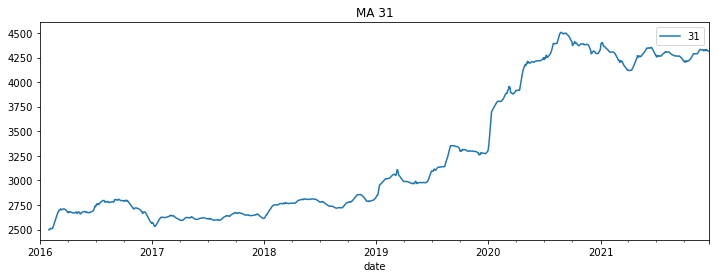

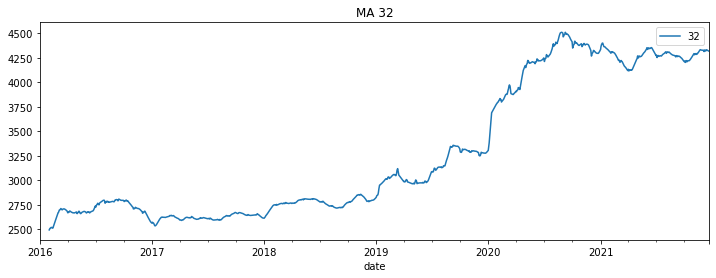

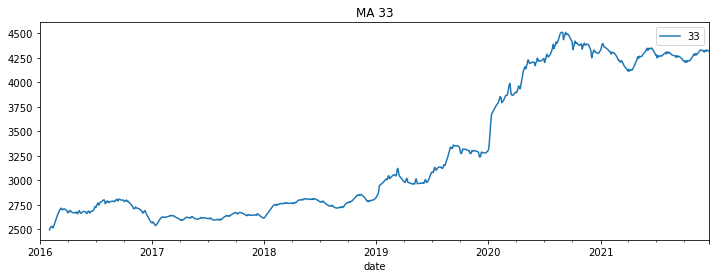

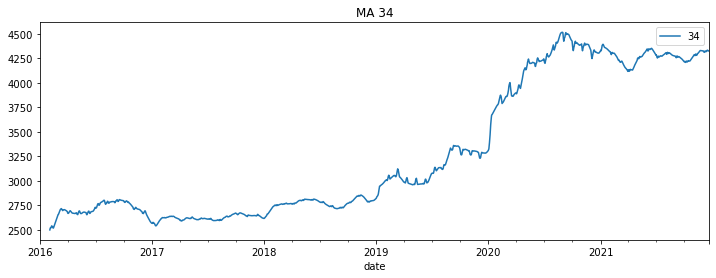

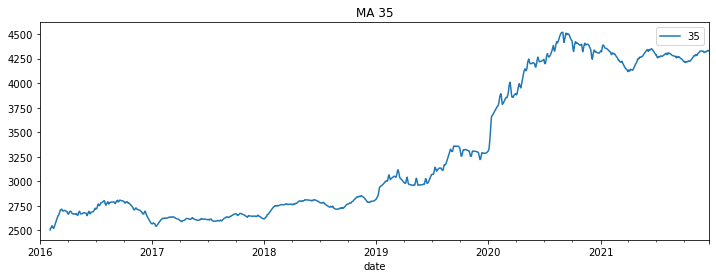

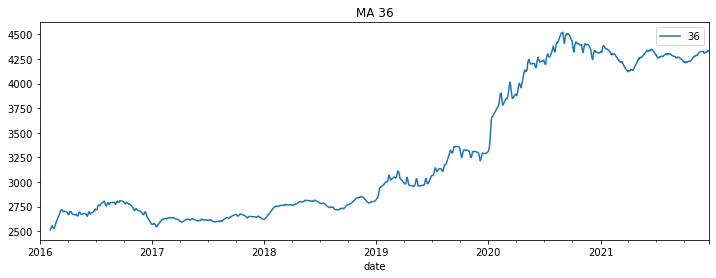

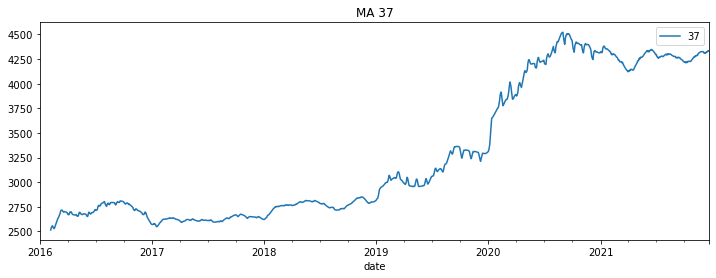

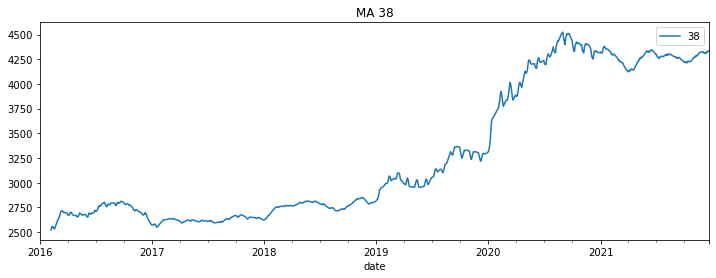

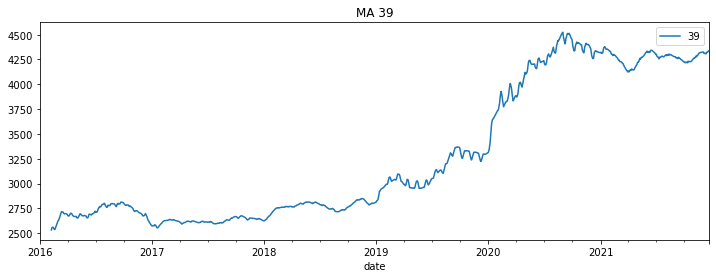

In [22]:
# to find the Window size or frequency :

plt.figure(figsize=(12,4))
g_df.price.plot(label="price")
plt.title("original series")

for i in range(20,40):
    plt.figure(figsize=(12,4))


    g_df["price"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

- In moving average we find the window size by considering the smoothness of the curve.
- At 30 we have got a smoother curve and less spikes compared to others.

# Time series Decomposition plot  

C:\Users\Mani\AppData\Local\Temp/ipykernel_10012/156449709.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_gold= seasonal_decompose(g_df.price,freq=45,model='additive')


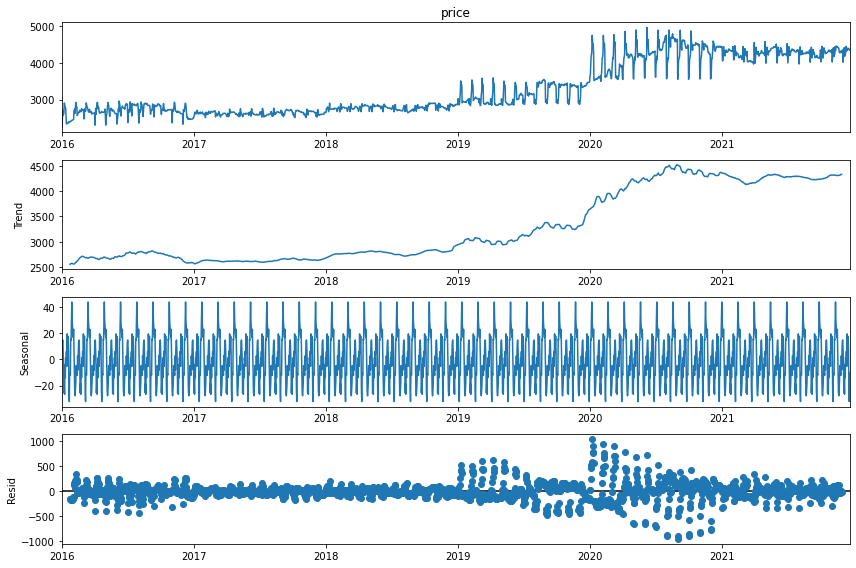

In [23]:
#Additive Seasonality:

plt.rcParams["figure.figsize"] = 12,8
decompose_gold= seasonal_decompose(g_df.price,freq=45,model='additive')
decompose_gold.plot()
plt.show()

C:\Users\Mani\AppData\Local\Temp/ipykernel_10012/2347738331.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_gold= seasonal_decompose(g_df.price,freq=45,model='multiplicative')


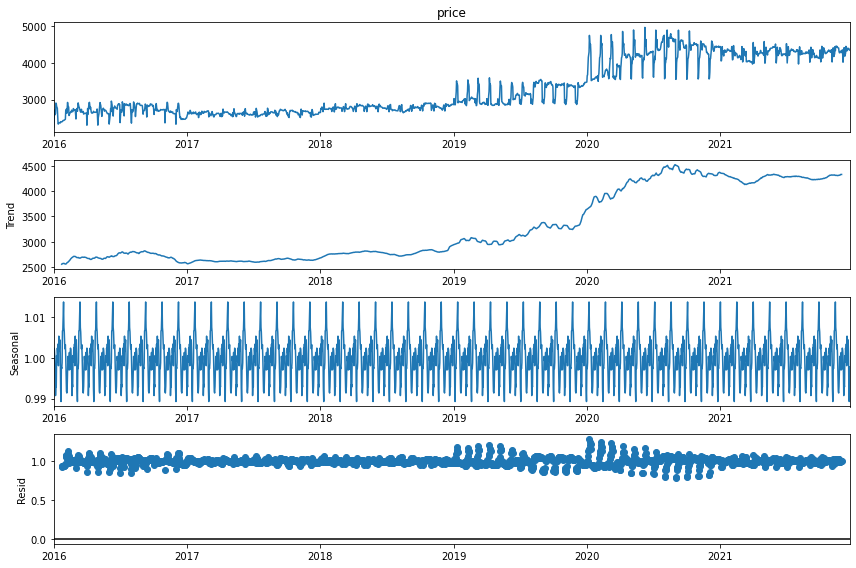

In [24]:
# Multiplicative seasonality :

plt.rcParams["figure.figsize"] = 12,8
decompose_gold= seasonal_decompose(g_df.price,freq=45,model='multiplicative')
decompose_gold.plot()
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

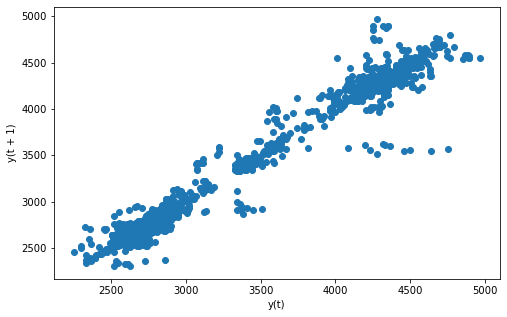

In [25]:
# Lag plot :

from pandas.plotting import lag_plot

plt.figure(figsize=(8,5))
lag_plot(series,lag=1)

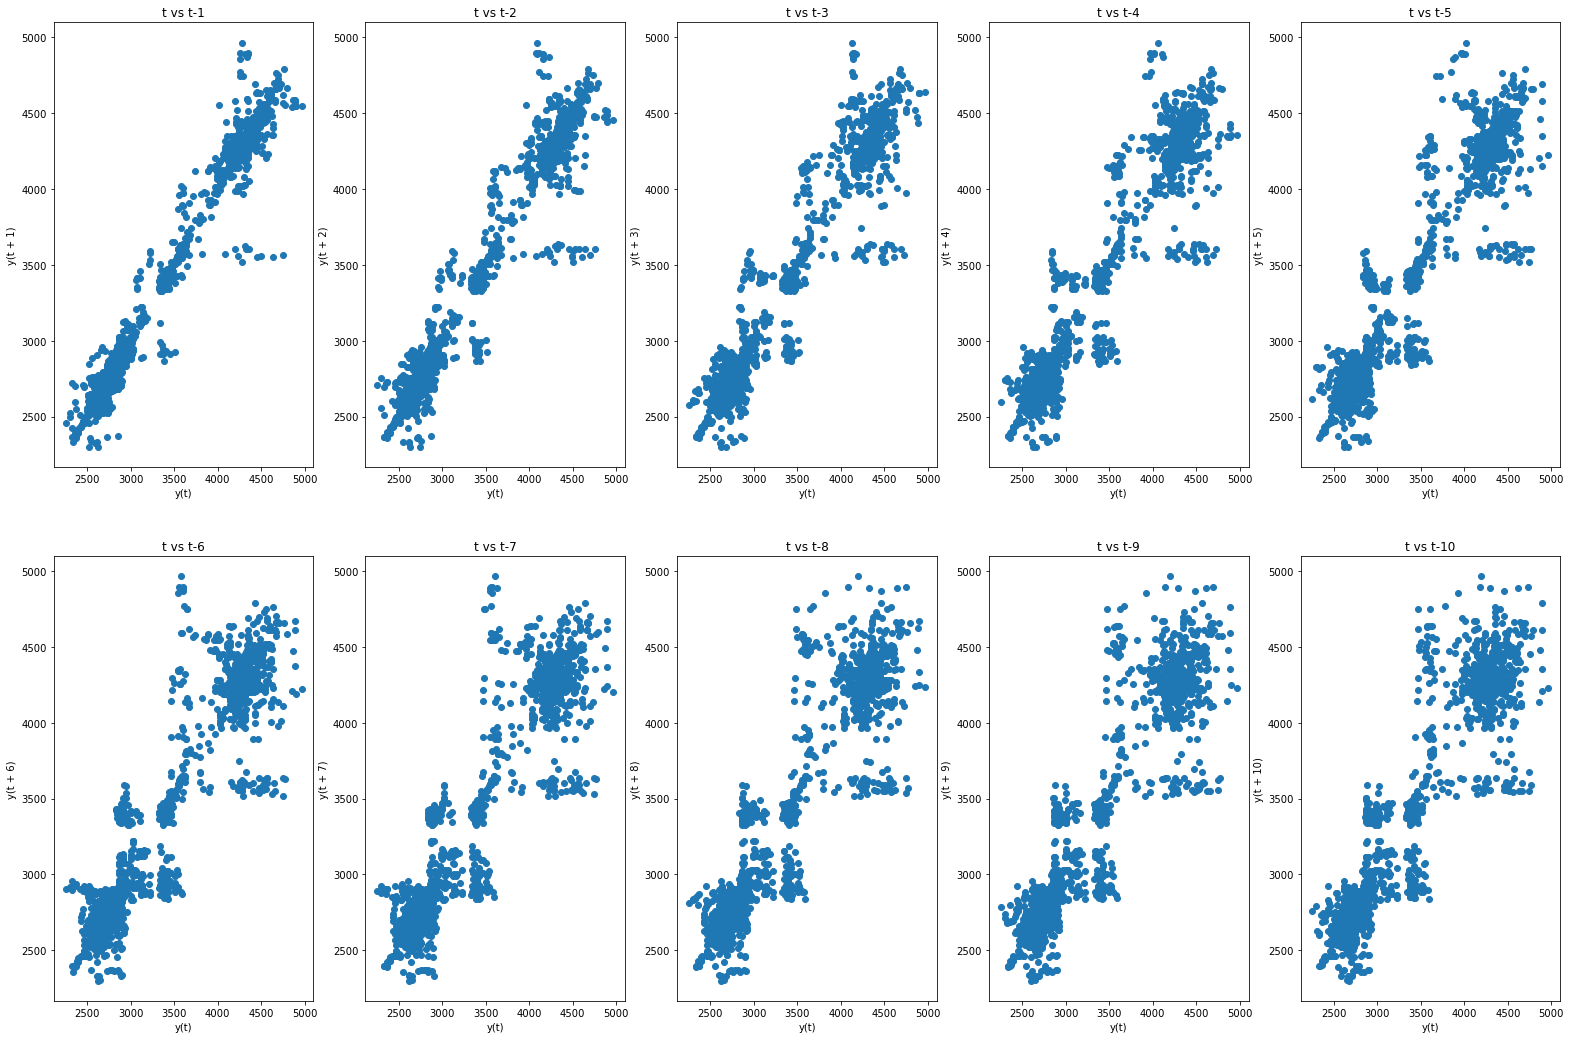

In [26]:
# Analyze the relation ship of multiple lags 

plt.figure(figsize=(27,18))

for i in range(1,11):
    plt.subplot(2, 5, i)
     
    plt.title('t vs t-' + str(i))
    lag_plot(series,lag=i,ax=None)
plt.show()

- Comparing different lags in the data

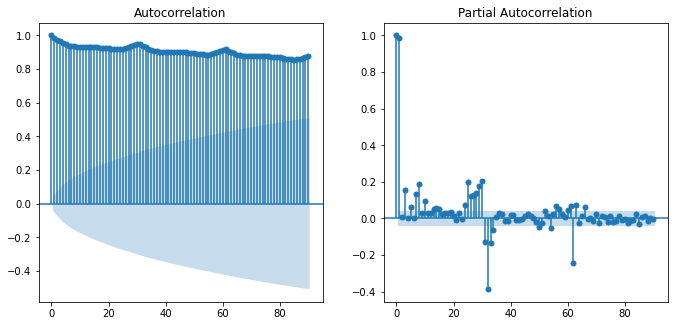

In [27]:
# ACF and PACF plots to find p and q values and to find the stationarity :

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=3)
plot_acf(g_df.price,lags=90,ax=ax1)
plot_pacf(g_df.price,lags=90,ax=ax2)
plt.show()

- Since the ACF plot is decaying very slowly , it indicates that the data is not stationary
- Lag value for 2,4,6 are more.

Text(0.5, 1.0, 'Variance')

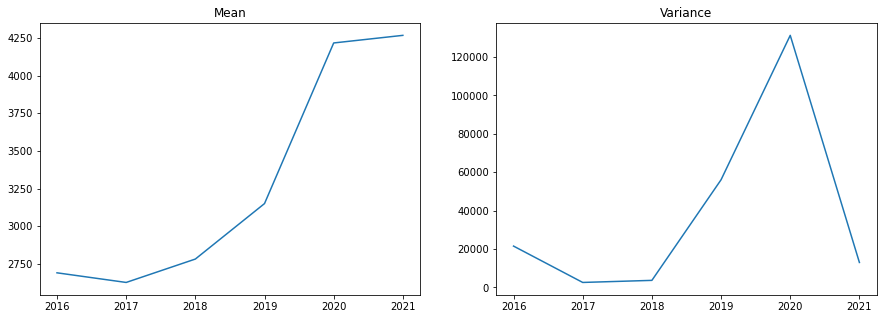

In [28]:
# MEAN and VARIANCE of the data over the years : To check the Stationarity of the data (Summary Statistics)

mean_df = g_df.groupby(by = g_df.year).mean()
var_df = g_df.groupby(by = g_df.year).var()
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(mean_df.price)
plt.title("Mean")

plt.subplot(1,2,2)
plt.plot(var_df.price)
plt.title("Variance")

- Mean and variance of the data should be constant .
- Here mean is showing strong trend and variance is also having some trend.
   - So, the data is not stationary.

In [29]:
# Statistical test to find the stationarity of the data :
# Augmented Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller


adf = adfuller(g_df.price, )

adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adf[4].items():
    adfoutput['Critical Value (%s)'%key] = value
    
print(adfoutput)


Test Statistic                   -0.309904
p-value                           0.924090
#Lags Used                       26.000000
Number of Observations Used    2155.000000
Critical Value (1%)              -3.433388
Critical Value (5%)              -2.862882
Critical Value (10%)             -2.567484
dtype: float64


- Since the p-value is more than the critical value , we say that the data is not stationary.

# Feature Engineering: 

In [30]:
# creating dummy values for month column to see how different months effect the output 

g_df=pd.get_dummies(data=g_df , columns=['month'])

In [31]:
g_df.head()

,price,year,Date,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
date,,,,,,,,,,,,,,,
2016-01-01,2252.60,2016,01,1,0,0,0,0,0,0,0,0,0,0,0
2016-01-02,2454.50,2016,02,1,0,0,0,0,0,0,0,0,0,0,0
2016-01-03,2708.10,2016,03,1,0,0,0,0,0,0,0,0,0,0,0
2016-01-04,2577.80,2016,04,1,0,0,0,0,0,0,0,0,0,0,0
2016-01-05,2597.75,2016,05,1,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Creating the transformations: 

g_df['t']=np.arange(1,2183)  # t

g_df['t_squared']=g_df['t']*g_df['t']   # t^2

g_df['log_price']=np.log(g_df['price'])   # log transform


In [33]:
g_df.tail()

,price,year,Date,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,t,t_squared,log_price
date,,,,,,,,,,,,,,,,,,
2021-12-17,4394.4,2021,17,0,0,0,0,0,0,0,0,0,0,0,1,2178,4743684,8.388086
2021-12-18,4389.5,2021,18,0,0,0,0,0,0,0,0,0,0,0,1,2179,4748041,8.386971
2021-12-19,4389.5,2021,19,0,0,0,0,0,0,0,0,0,0,0,1,2180,4752400,8.386971
2021-12-20,4354.1,2021,20,0,0,0,0,0,0,0,0,0,0,0,1,2181,4756761,8.378873
2021-12-21,4346.5,2021,21,0,0,0,0,0,0,0,0,0,0,0,1,2182,4761124,8.377126


# Train Test Split :

In [34]:
train=g_df.head(2152)
test=g_df.tail(30) # consider last seasonality for training

# Model Driven Forecasting

In [35]:
# Using months as features

In [36]:
# Linear model


linear_model=smf.ols('price ~ t',data=train).fit()
pred_linear=linear_model.predict(test['t'])
rmse_linear=sqrt(metrics.mean_squared_error(test['price'],pred_linear))
rmse_linear

103.15443682194707

In [37]:
# Exponential model

exp_model=smf.ols('log_price ~ t' , data = train).fit()
pred_exp = exp_model.predict(test['t'])
rmse_exp=sqrt(metrics.mean_squared_error(test['price'] , np.exp(pred_exp)))
rmse_exp

144.41640747447596

In [38]:
# Quadratic 

quad_model=smf.ols('price~t+t_squared' , data = train).fit()
pred_quad = quad_model.predict(test[['t','t_squared']])
rmse_quad=sqrt(metrics.mean_squared_error(test['price'] , pred_quad))
rmse_quad

533.9441755137655

In [39]:
# Additive Seasonility

add_sea_model=smf.ols('price~month_01+month_02+month_03+month_04+month_05+month_06+month_07+month_08+month_09+month_10+month_11+month_12',data=train).fit()
pred_add_sea=add_sea_model.predict(test[['month_01','month_02','month_03','month_04','month_05','month_06','month_07','month_08','month_09','month_10','month_11','month_12']])
rmse_add_sea=sqrt(metrics.mean_squared_error(test['price'] , pred_add_sea))
rmse_add_sea

1128.1919984721867

In [40]:
# Additive seasonality Quadratic Trend

add_sea_quad_model=smf.ols('price~t+t_squared+month_01+month_02+month_03+month_04+month_05+month_06+month_07+month_08+month_09+month_10+month_11+month_12',data=train).fit()
pred_add_sea_quad=add_sea_quad_model.predict(test[['t','t_squared','month_01','month_02','month_03','month_04','month_05','month_06','month_07','month_08','month_09','month_10','month_11','month_12']])
rmse_add_sea_quad=sqrt(metrics.mean_squared_error(test['price'] , pred_add_sea_quad))
rmse_add_sea_quad

452.6530675486844

In [ ]:
# Multiplicative seasonality

mult_sea_model=smf.ols('log_price~month_01+month_02+month_03+month_04+month_05+month_06+month_07+month_08+month_09+month_10+month_11+month_12',data=train).fit()
pred_mult_sea=mult_sea_model.predict(test[['month_01','month_02','month_03','month_04','month_05','month_06','month_07','month_08','month_09','month_10','month_11','month_12']])
rmse_mult_sea=sqrt(metrics.mean_squared_error(test['price'] , np.exp(pred_mult_sea)))
rmse_mult_sea

In [ ]:
# Multiplicative seasonality with linear Trend

mult_add_sea_model=smf.ols('log_price~t+month_01+month_02+month_03+month_04+month_05+month_06+month_07+month_08+month_09+month_10+month_11+month_12',data=train).fit()
pred_mult_add_sea=mult_add_sea_model.predict(test[['t','month_01','month_02','month_03','month_04','month_05','month_06','month_07','month_08','month_09','month_10','month_11','month_12']])
rmse_mult_add_sea=sqrt(metrics.mean_squared_error(test['price'] , np.exp(pred_mult_add_sea)))
rmse_mult_add_sea

In [ ]:
# Comparing the rmse of all models

rmse={'Models' :['linear_model','exp_model','quad_model','add_sea_model','add_sea_quad_model','mult_sea_model','mult_add_sea_model'],
       'rmse values ':[rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea]}
rmse_df=pd.DataFrame(rmse)
rmse_df

In [ ]:
# Using the DATE as a feature

In [ ]:
# Additive Seasonility

add_sea_model=smf.ols('price~date',data=train).fit()
pred_add_sea=add_sea_model.predict(test[['date']])
rmse_add_sea=sqrt(metrics.mean_squared_error(test['price'] , pred_add_sea))
rmse_add_sea

In [ ]:
# Additive seasonality Quadratic Trend

add_sea_quad_model=smf.ols('price~t+t_squared+date',data=train).fit()
pred_add_sea_quad=add_sea_quad_model.predict(test[['t','t_squared','date']])
rmse_add_sea_quad=sqrt(metrics.mean_squared_error(test['price'] , pred_add_sea_quad))
rmse_add_sea_quad

In [ ]:
# Multiplicative seasonality

mult_sea_model=smf.ols('log_price~date',data=train).fit()
pred_mult_sea=mult_sea_model.predict(test[['date']])
rmse_mult_sea=sqrt(metrics.mean_squared_error(test['price'] , np.exp(pred_mult_sea)))
rmse_mult_sea

In [ ]:
# Multiplicative seasonality with linear Trend

mult_add_sea_model=smf.ols('log_price~t+date',data=train).fit()
pred_mult_add_sea=mult_add_sea_model.predict(test[['t','date']])
rmse_mult_add_sea=sqrt(metrics.mean_squared_error(test['price'] , np.exp(pred_mult_add_sea)))
rmse_mult_add_sea

In [ ]:
# Comparing the rmse of all models

rmse={'Models' :['linear_model','exp_model','quad_model','add_sea_model','add_sea_quad_model','mult_sea_model','mult_add_sea_model'],
       'rmse values ':[rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea]}
rmse_df=pd.DataFrame(rmse)
rmse_df